In [2]:
import numpy as np
import pandas as pd
import pandas_profiling
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
train = pd.read_csv('heart_train.csv')

In [4]:
test = pd.read_csv('heart_test.csv')

In [5]:
data = pd.concat([train, test], ignore_index=True)

In [69]:
shape = data.shape
print(f'Dataset is {shape[0]} rows by {shape[1]} columns')
data.head()

Dataset is 303 rows by 14 columns


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,69,0,3,140,239,0,1,151,0,1.8,2,2,2,1
1,66,1,1,160,246,0,1,120,1,0.0,1,3,1,0
2,55,0,0,128,205,0,2,130,1,2.0,1,1,3,0
3,57,1,0,110,335,0,1,143,1,3.0,1,1,3,0
4,71,0,2,110,265,1,0,130,0,0.0,2,1,2,1


In [70]:
numeric = []
categorical = []
boolean = []
for series in data:
    if str(data[series].dtype) == 'int64' or str(data[series].dtype) == 'float64':
        if data[series].unique().size == 2:
            boolean.append(series)
        else:
            numeric.append(series)
    else:
        categorical.append(series)
print('numeric', numeric, 'categorical', categorical, 'boolean', boolean)


numeric ['age', 'cp', 'trestbps', 'chol', 'restecg', 'thalach', 'oldpeak', 'slope', 'ca', 'thal'] categorical [] boolean ['sex', 'fbs', 'exang', 'target']


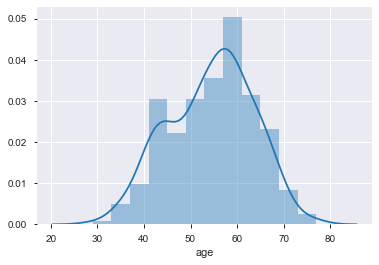

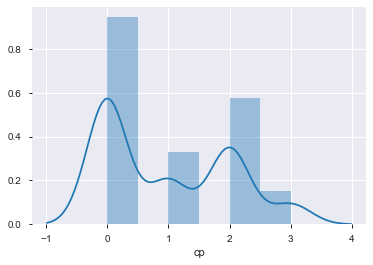

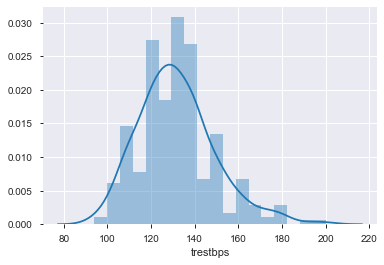

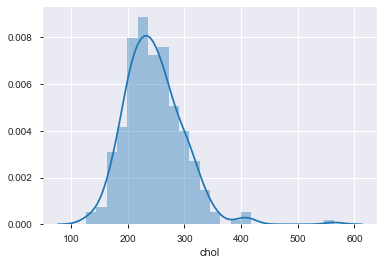

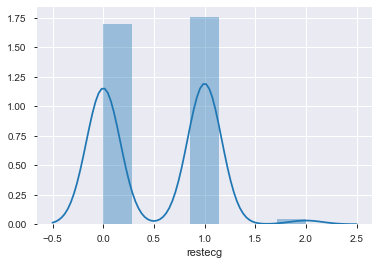

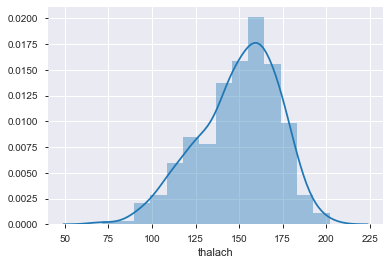

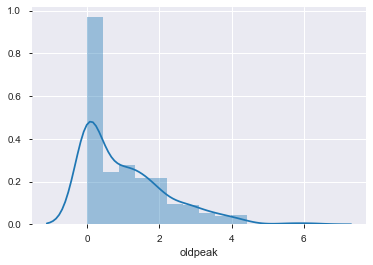

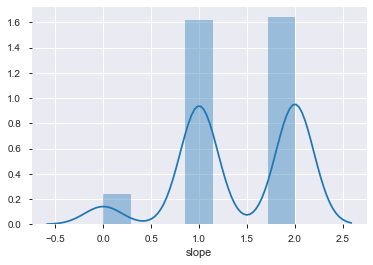

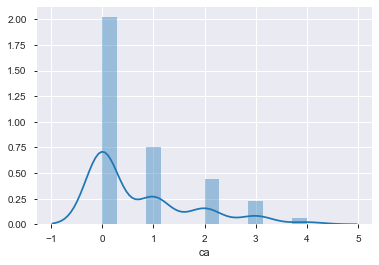

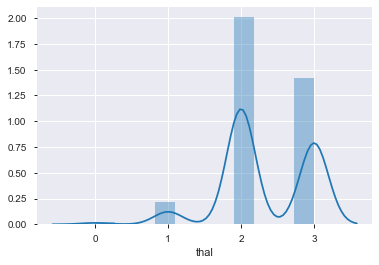

In [71]:
for num in numeric:
    sns.distplot(data[num])
    plt.show()

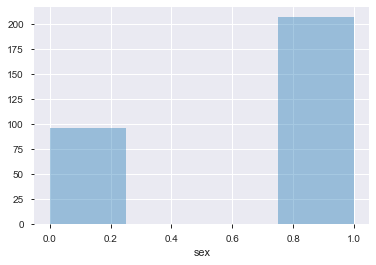

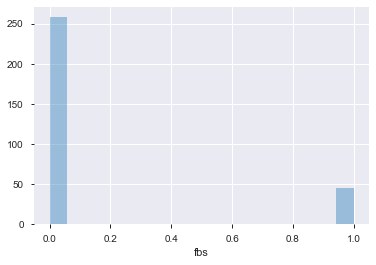

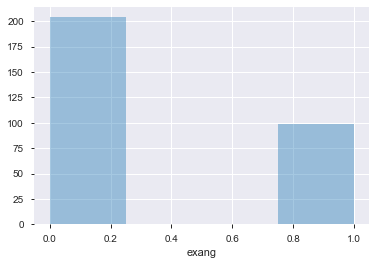

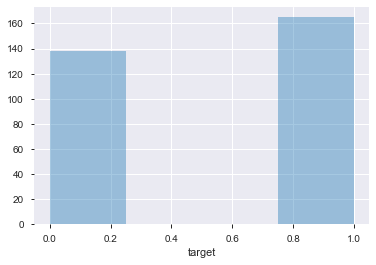

In [72]:
for cat_bool in categorical + boolean:
    sns.distplot(data[cat_bool], kde=False)
    plt.show()

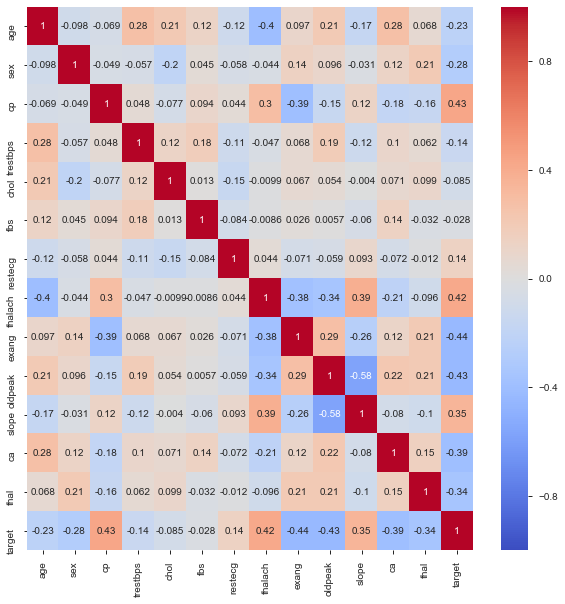

In [7]:
sns.heatmap(data.corr(), vmin=-1, cmap='coolwarm', annot=True)
plt.show()
plt.rcParams['figure.figsize'] = (10,10)

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
log = LogisticRegression()
X_train = train.drop(columns='target')
y_train = train['target']
X_test = test.drop(columns='target')
y_test = test['target']
log.fit(X_train, y_train)
log.score(X_test, y_test)

0.8032786885245902

In [75]:
data.profile_report()

I think I would use cp, slope, thalach and maybe ca, exang, oldpeak based on the correlation with target